# Using package

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [6]:
# There are six datasets
datasets = ['breast-cancer', 'caesarian', 'dataR2', 'diabetes', 'haberman', 'heart_failure_clinical_records_dataset']

In [7]:
# There are nine classifiers
clfs = ['Adaboost', 'Catboost', 'DecisionTree', 'ExtraTree', 'Logit', 'Random_forest', 'SVM', 'Xgboost', 'kNN']

In [8]:
# There are seventeen sampling methods
samplings = ['ADASYN', 'AMSCO', 'Borderline_smote', 'EditedNearestNeighbours', 'Lee', 'NRAS', 'NearMiss', 'ProWSyn', 
             'RandomOverSampler', 'RandomUnderSampler', 'SMOTE', 'Smote_tomek', 'Tomek', 'kmeans_SMOTE', 'lvq_smote',
             'polynom_fit_SMOTE', 'pure']

In [10]:
# There are nine metrics
metrics = ['precision', 'recall', 'specificity', 'fscore', 'gmean', 'mcc', 'balanced_acc', 'accuracy', 'time_exec']

In [11]:
# Structure of one dataset's result
df = pd.read_csv('data/breast-cancer.csv')
df

clf                     imbl           dataset  precision   recall  \
0    Adaboost                   ADASYN  breast-cancer_10   0.232439  0.56250   
1    Adaboost                    AMSCO  breast-cancer_10   0.232495  0.58250   
2    Adaboost         Borderline_smote  breast-cancer_10   0.230507  0.49500   
3    Adaboost  EditedNearestNeighbours  breast-cancer_10   0.123714  0.10000   
4    Adaboost                      Lee  breast-cancer_10   0.237625  0.53200   
..        ...                      ...               ...        ...      ...   
760       kNN                    Tomek  breast-cancer_90   0.655036  0.65500   
761       kNN             kmeans_SMOTE  breast-cancer_90   0.664653  0.66200   
762       kNN                lvq_smote  breast-cancer_90   0.662485  0.67575   
763       kNN        polynom_fit_SMOTE  breast-cancer_90   0.638757  0.78875   
764       kNN                     pure  breast-cancer_90   0.672326  0.63125   

     specificity    fscore     gmean       mcc  balanced_acc  accuracy  \
0       0.775590  0.318847  0.628217  0.243926      0.669045  0.755767   
1       0.739641  0.316076  0.606320  0.246643      0.661071  0.725023   
2       0.779590  0.296583  0.573631  0.211586      0.637295  0.753116   
3       0.984615  0.099352  0.147003  0.090852      0.542308  0.902326   
4       0.800513  0.318110  0.622540  0.244020      0.666256  0.775535   
..           ...       ...       ...       ...           ...       ...   
760     0.684444  0.651101  0.665500  0.342951      0.669722  0.670588   
761     0.695889  0.659232  0.674392  0.361495      0.678944  0.679941   
762     0.686111  0.664427  0.675835  0.365757      0.680931  0.681235   
763     0.596667  0.701953  0.679250  0.396130      0.692708  0.687059   
764     0.720000  0.646936  0.669957  0.356235      0.675625  0.678235   

     std_precision  std_recall  std_specificity  std_fscore  std_gmean  \
0         0.083084    0.200352         0.086191    0.091571   0.116466   
1         0.082768    0.183190         0.123892    0.091766   0.100711   
2         0.112977    0.192678         0.107488    0.119131   0.155802   
3         0.117121    0.099494         0.021199    0.093609   0.142930   
4         0.097061    0.197757         0.090955    0.109245   0.128103   
..             ...         ...              ...         ...        ...   
760       0.086838    0.104706         0.110352    0.084262   0.080132   
761       0.080286    0.104740         0.098631    0.081200   0.075026   
762       0.078417    0.105644         0.099579    0.079643   0.073532   
763       0.066888    0.119080         0.110367    0.076650   0.078897   
764       0.081553    0.107089         0.094060    0.084035   0.075289   

      std_mcc  std_balanced_acc  std_accuracy   time_exec  
0    0.126405          0.088632      0.074198    8.843642  
1    0.123696          0.080294      0.106713  621.076487  
2    0.143385          0.094218      0.092538    8.832732  
3    0.088488          0.041767      0.014087    5.785935  
4    0.139065          0.092863      0.079915   84.504883  
..        ...               ...           ...         ...  
760  0.158406          0.078879      0.078898    0.975715  
761  0.145991          0.072939      0.072602    9.157508  
762  0.145064          0.072096      0.071684    5.307557  
763  0.150821          0.074339      0.073898    0.539157  
764  0.145155          0.072551      0.071921    0.479703  

[765 rows x 20 columns]

# Load data with imbl level

In [13]:
def load_with_level(data, metric = 'fscore'):
    """
    read data from result file and choose the metric to explore
    """
    length = len(data)
    data = pd.concat([data['clf'][0 : int(length / 5)], data['imbl'][0 : int(length / 5)],
                       data[metric][0 : int(length / 5)].reset_index(drop = True), 
                       data[metric][int(length / 5) : 2 * int(length / 5)].reset_index(drop = True),
                       data[metric][2 * int(length / 5) : 3 * int(length / 5)].reset_index(drop = True),
                       data[metric][3 * int(length / 5) : 4 * int(length / 5)].reset_index(drop = True),
                       data[metric][4 * int(length / 5) : length].reset_index(drop = True)], axis = 1)
    data.columns = ['clf', 'imbl', '10', '30', '50', '70', '90']
    return data

In [14]:
# Load breast-cancer result with fscore metric
data = load_with_level(df, metric = 'fscore')
data

clf                     imbl        10        30        50  \
0    Adaboost                   ADASYN  0.318847  0.511480  0.543178   
1    Adaboost                    AMSCO  0.316076  0.457345  0.540509   
2    Adaboost         Borderline_smote  0.296583  0.480108  0.530071   
3    Adaboost  EditedNearestNeighbours  0.099352  0.503756  0.546172   
4    Adaboost                      Lee  0.318110  0.516707  0.549481   
..        ...                      ...       ...       ...       ...   
148       kNN                    Tomek  0.144000  0.465017  0.530295   
149       kNN             kmeans_SMOTE  0.353329  0.521863  0.552802   
150       kNN                lvq_smote  0.435449  0.548907  0.583383   
151       kNN        polynom_fit_SMOTE  0.411387  0.553252  0.574416   
152       kNN                     pure  0.145333  0.464591  0.517120   

           70        90  
0    0.606344  0.597489  
1    0.605800  0.595344  
2    0.587636  0.593211  
3    0.605505  0.636433  
4    0.605178  0.590128  
..        ...       ...  
148  0.630870  0.651101  
149  0.650199  0.659232  
150  0.663399  0.664427  
151  0.679037  0.701953  
152  0.627453  0.646936  

[153 rows x 7 columns]

# Load all result by fscore metric

In [19]:
all_result = pd.DataFrame()
name = list()

for dataset in datasets:
    # read data from csv file
    df = pd.read_csv('data/' + dataset + '.csv')
    # load data by metric
    data = load_with_level(df, metric = 'fscore')
    # concatenate data with all_result
    all_result = pd.concat([all_result, data], ignore_index = True)
    # add name of dataset
    name = name + [dataset] * len(data)

all_result['name'] = name
all_result

clf                     imbl        10        30        50  \
0    Adaboost                   ADASYN  0.318847  0.511480  0.543178   
1    Adaboost                    AMSCO  0.316076  0.457345  0.540509   
2    Adaboost         Borderline_smote  0.296583  0.480108  0.530071   
3    Adaboost  EditedNearestNeighbours  0.099352  0.503756  0.546172   
4    Adaboost                      Lee  0.318110  0.516707  0.549481   
..        ...                      ...       ...       ...       ...   
913       kNN                    Tomek  0.064381  0.286664  0.494730   
914       kNN             kmeans_SMOTE  0.063048  0.352167  0.517583   
915       kNN                lvq_smote  0.432587  0.517947  0.576129   
916       kNN        polynom_fit_SMOTE  0.422875  0.536856  0.591970   
917       kNN                     pure  0.064381  0.263564  0.472079   

           70        90                                    name  
0    0.606344  0.597489                           breast-cancer  
1    0.605800  0.595344                           breast-cancer  
2    0.587636  0.593211                           breast-cancer  
3    0.605505  0.636433                           breast-cancer  
4    0.605178  0.590128                           breast-cancer  
..        ...       ...                                     ...  
913  0.589237  0.673940  heart_failure_clinical_records_dataset  
914  0.619706  0.684059  heart_failure_clinical_records_dataset  
915  0.641173  0.683961  heart_failure_clinical_records_dataset  
916  0.666521  0.713214  heart_failure_clinical_records_dataset  
917  0.581160  0.669049  heart_failure_clinical_records_dataset  

[918 rows x 8 columns]

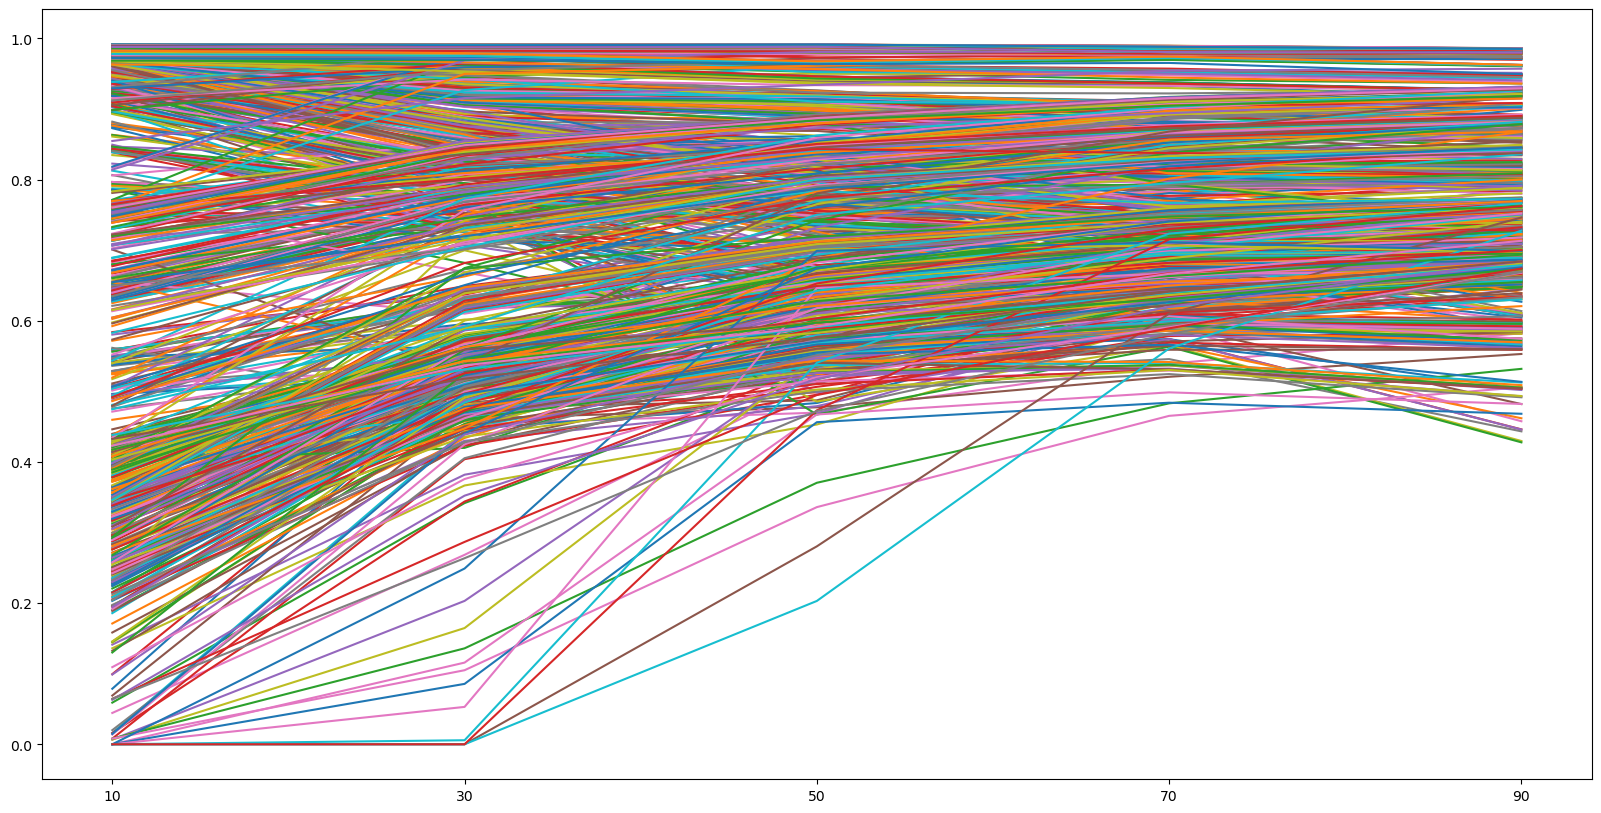

In [20]:
plt.figure(figsize = (20, 10))
for i in range(len(all_result)):
    plt.plot(all_result.loc[i, '10':'90'])
plt.show()

In [26]:
from sklearn.cluster import KMeans
dp = all_result.loc[:, '10':'90']
# kmeans = KMeans(n_clusters = 10).fit(dp)

In [28]:
dp

10        30        50        70        90
0    0.318847  0.511480  0.543178  0.606344  0.597489
1    0.316076  0.457345  0.540509  0.605800  0.595344
2    0.296583  0.480108  0.530071  0.587636  0.593211
3    0.099352  0.503756  0.546172  0.605505  0.636433
4    0.318110  0.516707  0.549481  0.605178  0.590128
..        ...       ...       ...       ...       ...
913  0.064381  0.286664  0.494730  0.589237  0.673940
914  0.063048  0.352167  0.517583  0.619706  0.684059
915  0.432587  0.517947  0.576129  0.641173  0.683961
916  0.422875  0.536856  0.591970  0.666521  0.713214
917  0.064381  0.263564  0.472079  0.581160  0.669049

[918 rows x 5 columns]

number of samples:  150 

datasets:  ['caesarian' 'dataR2'] 

number of classifiers:  9
['Adaboost' 'Catboost' 'DecisionTree' 'ExtraTree' 'Logit' 'Random_forest'
 'SVM' 'Xgboost' 'kNN'] 

number of samplings:  15
['ADASYN' 'AMSCO' 'Borderline_smote' 'Lee' 'NRAS' 'ProWSyn'
 'RandomOverSampler' 'RandomUnderSampler' 'SMOTE' 'Smote_tomek' 'Tomek'
 'kmeans_SMOTE' 'lvq_smote' 'polynom_fit_SMOTE' 'pure'] 

miss classifiers: [] 

miss samplings: ['EditedNearestNeighbours', 'NearMiss'] 



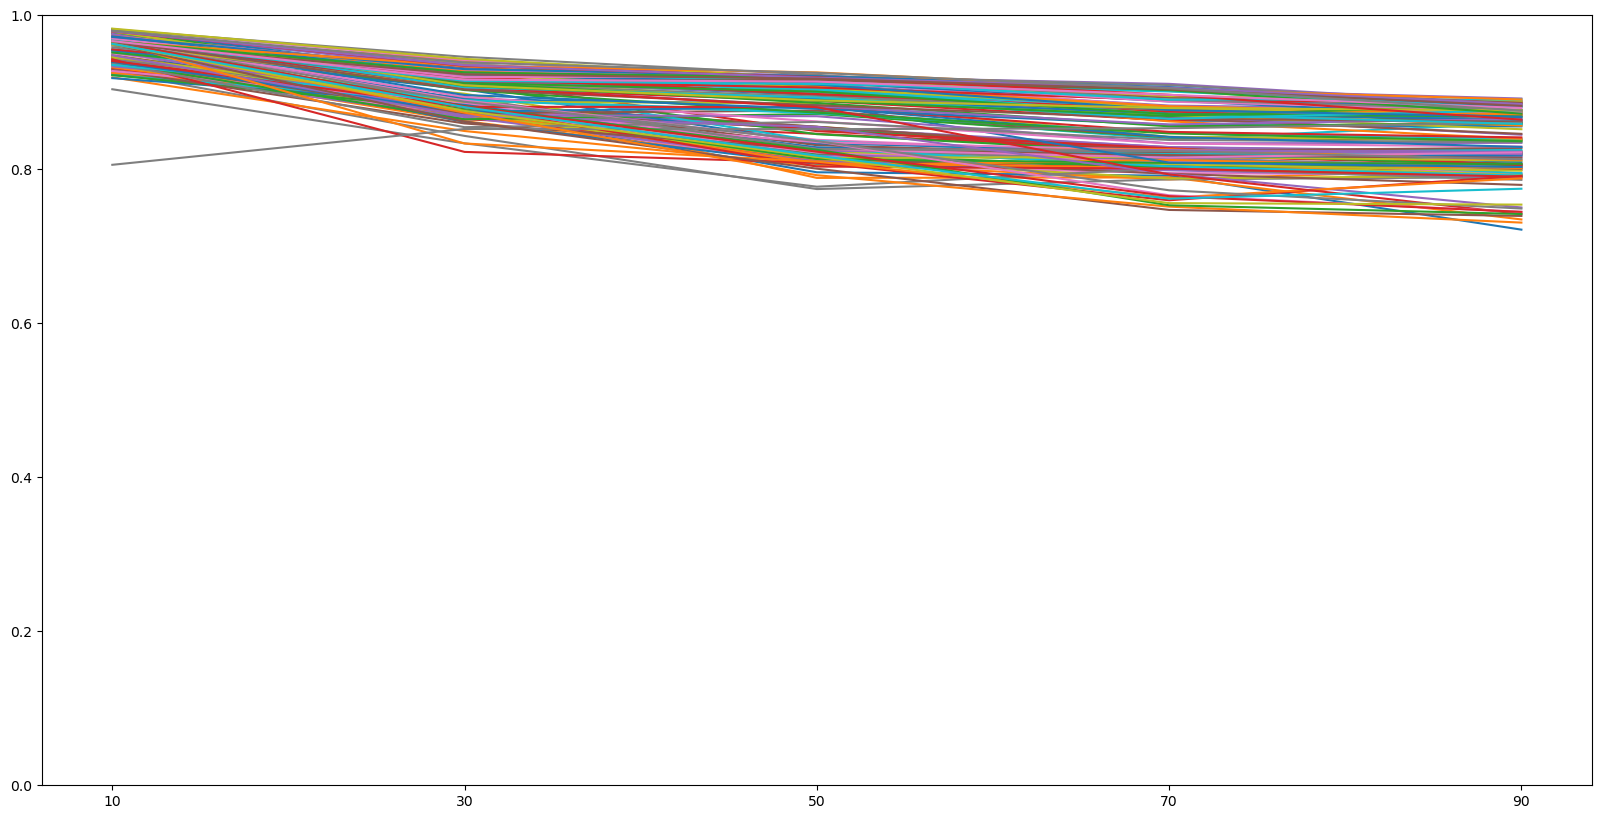

number of samples:  165 

datasets:  ['breast-cancer' 'caesarian' 'haberman'] 

number of classifiers:  9
['Adaboost' 'Catboost' 'DecisionTree' 'ExtraTree' 'Logit' 'Random_forest'
 'SVM' 'Xgboost' 'kNN'] 

number of samplings:  17
['ADASYN' 'AMSCO' 'Borderline_smote' 'EditedNearestNeighbours' 'Lee'
 'NRAS' 'NearMiss' 'ProWSyn' 'RandomOverSampler' 'RandomUnderSampler'
 'SMOTE' 'Smote_tomek' 'Tomek' 'kmeans_SMOTE' 'lvq_smote'
 'polynom_fit_SMOTE' 'pure'] 

miss classifiers: [] 

miss samplings: [] 



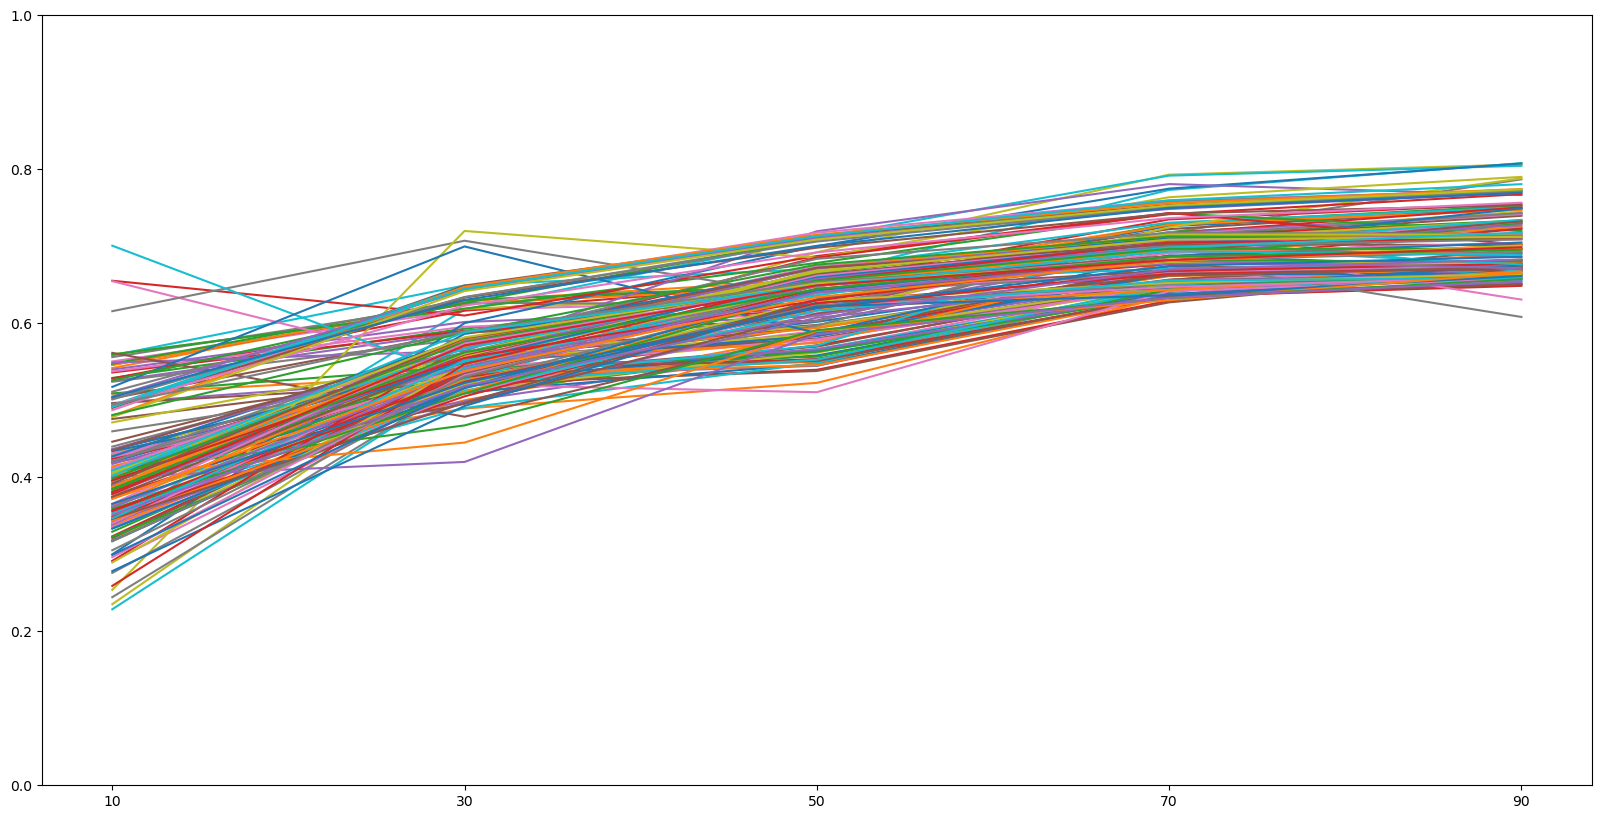

number of samples:  154 

datasets:  ['dataR2' 'diabetes'] 

number of classifiers:  9
['Adaboost' 'Catboost' 'DecisionTree' 'ExtraTree' 'Logit' 'Random_forest'
 'SVM' 'Xgboost' 'kNN'] 

number of samplings:  17
['ADASYN' 'AMSCO' 'Borderline_smote' 'EditedNearestNeighbours' 'Lee'
 'NRAS' 'NearMiss' 'ProWSyn' 'RandomOverSampler' 'RandomUnderSampler'
 'SMOTE' 'Smote_tomek' 'Tomek' 'kmeans_SMOTE' 'lvq_smote'
 'polynom_fit_SMOTE' 'pure'] 

miss classifiers: [] 

miss samplings: [] 



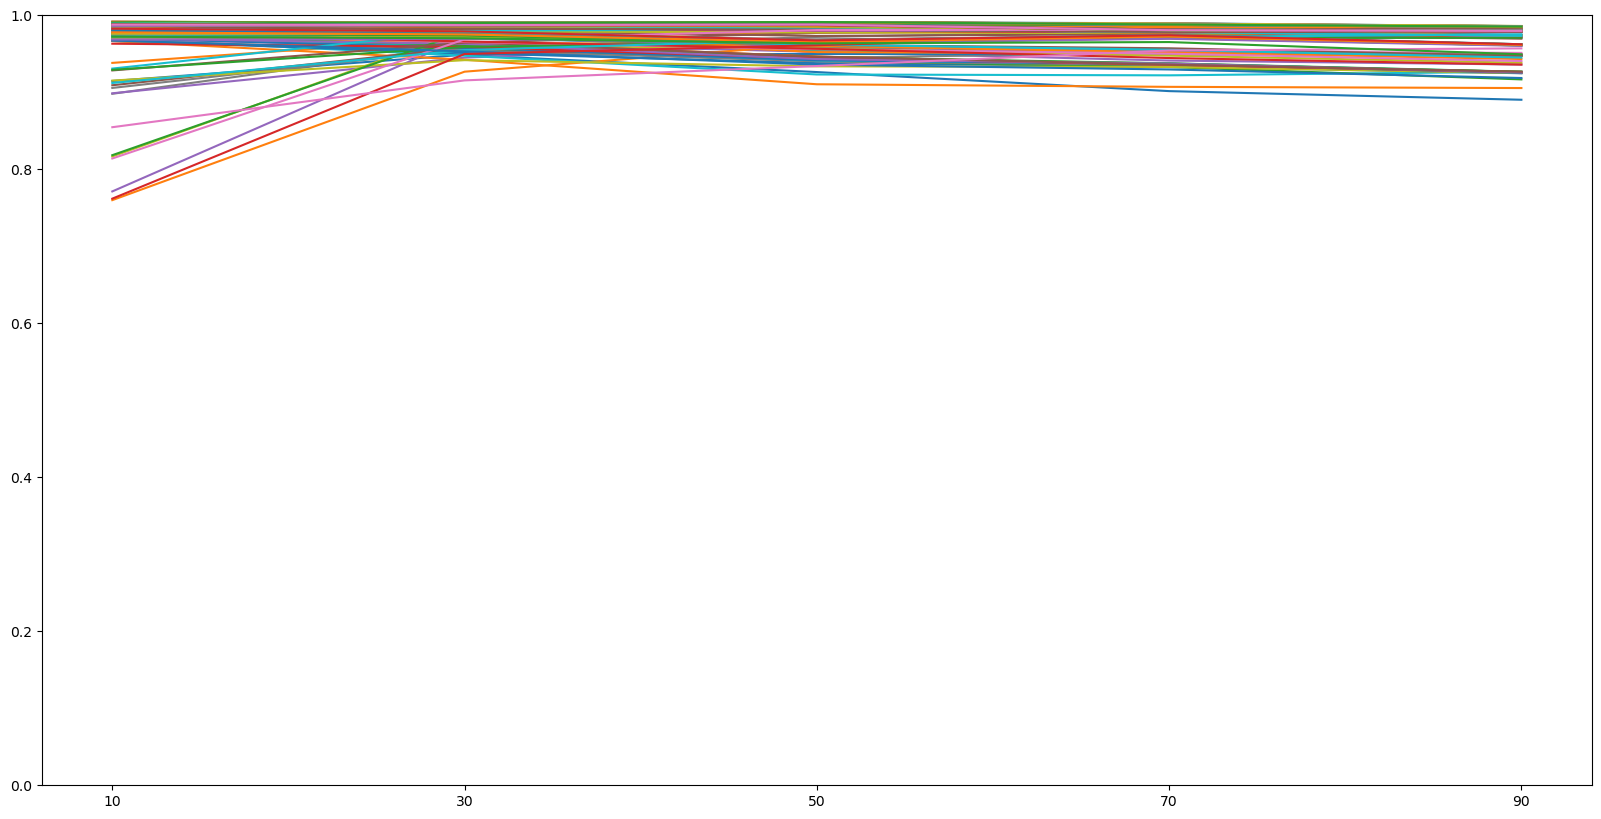

number of samples:  44 

datasets:  ['breast-cancer' 'caesarian' 'dataR2'] 

number of classifiers:  7
['Adaboost' 'Catboost' 'DecisionTree' 'ExtraTree' 'Random_forest'
 'Xgboost' 'kNN'] 

number of samplings:  15
['ADASYN' 'AMSCO' 'Borderline_smote' 'Lee' 'NearMiss' 'ProWSyn'
 'RandomOverSampler' 'RandomUnderSampler' 'SMOTE' 'Smote_tomek' 'Tomek'
 'kmeans_SMOTE' 'lvq_smote' 'polynom_fit_SMOTE' 'pure'] 

miss classifiers: ['Logit', 'SVM'] 

miss samplings: ['EditedNearestNeighbours', 'NRAS'] 



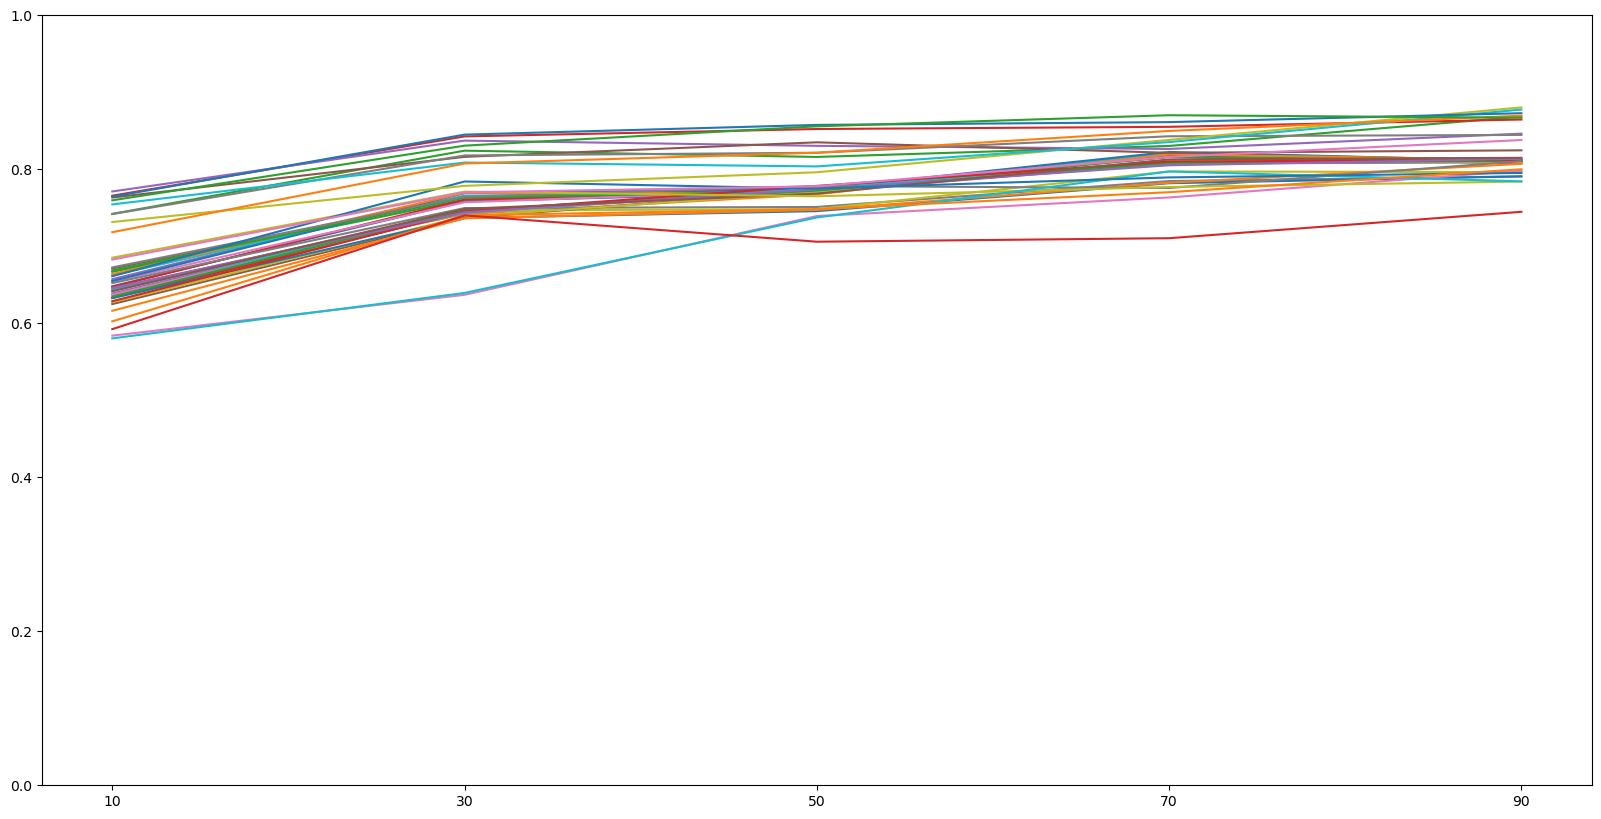

number of samples:  124 

datasets:  ['breast-cancer' 'haberman'] 

number of classifiers:  9
['Adaboost' 'Catboost' 'DecisionTree' 'ExtraTree' 'Logit' 'Random_forest'
 'SVM' 'Xgboost' 'kNN'] 

number of samplings:  17
['ADASYN' 'AMSCO' 'Borderline_smote' 'EditedNearestNeighbours' 'Lee'
 'NRAS' 'NearMiss' 'ProWSyn' 'RandomOverSampler' 'RandomUnderSampler'
 'SMOTE' 'Smote_tomek' 'Tomek' 'kmeans_SMOTE' 'lvq_smote'
 'polynom_fit_SMOTE' 'pure'] 

miss classifiers: [] 

miss samplings: [] 



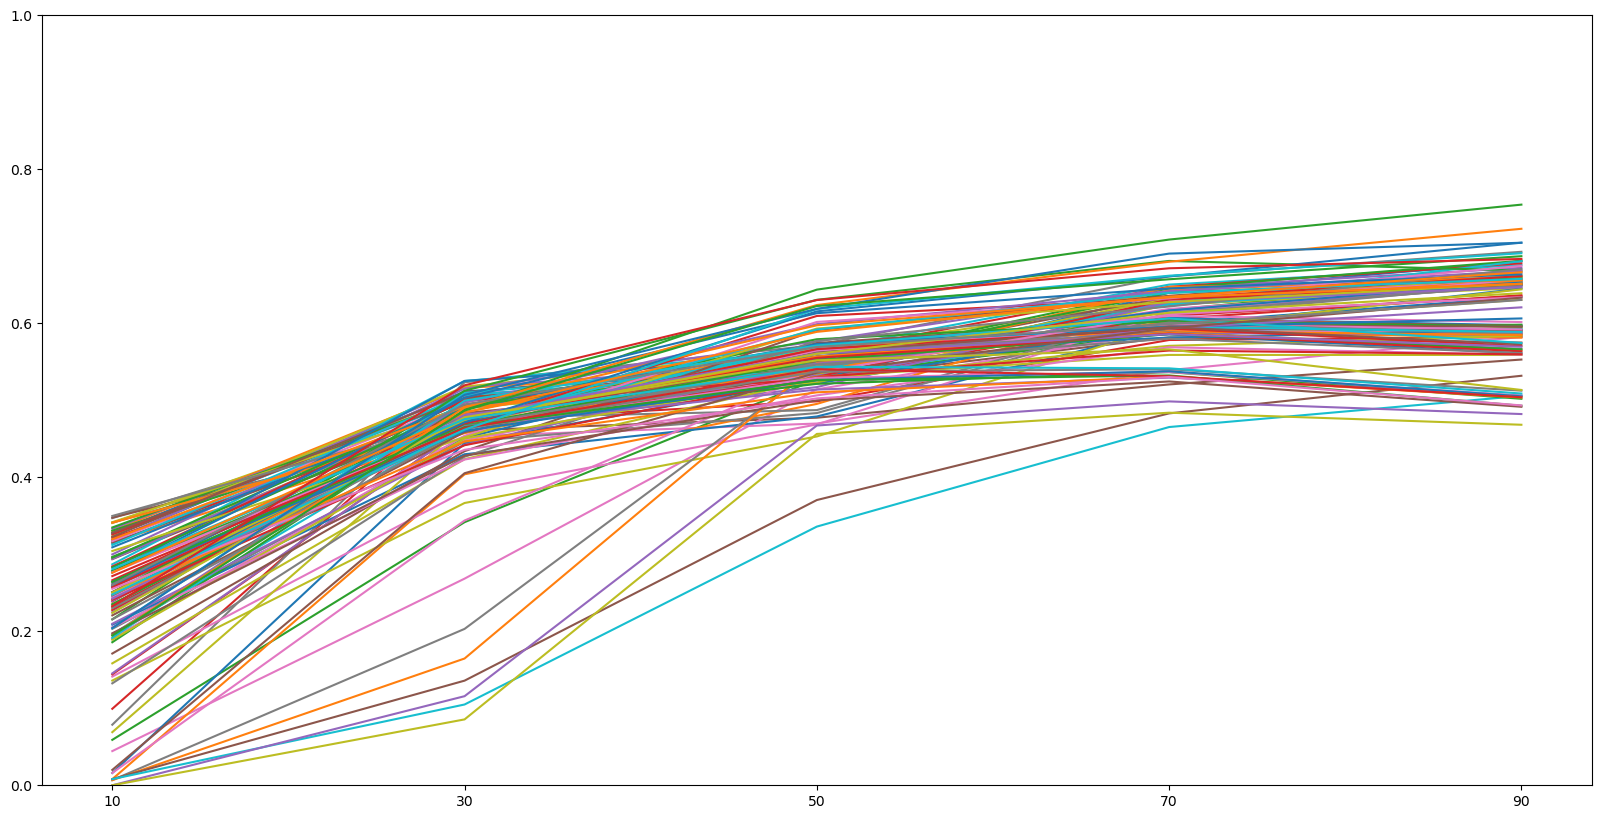

number of samples:  128 

datasets:  ['caesarian' 'dataR2'] 

number of classifiers:  9
['Adaboost' 'Catboost' 'DecisionTree' 'ExtraTree' 'Logit' 'Random_forest'
 'SVM' 'Xgboost' 'kNN'] 

number of samplings:  17
['ADASYN' 'AMSCO' 'Borderline_smote' 'EditedNearestNeighbours' 'Lee'
 'NRAS' 'NearMiss' 'ProWSyn' 'RandomOverSampler' 'RandomUnderSampler'
 'SMOTE' 'Smote_tomek' 'Tomek' 'kmeans_SMOTE' 'lvq_smote'
 'polynom_fit_SMOTE' 'pure'] 

miss classifiers: [] 

miss samplings: [] 



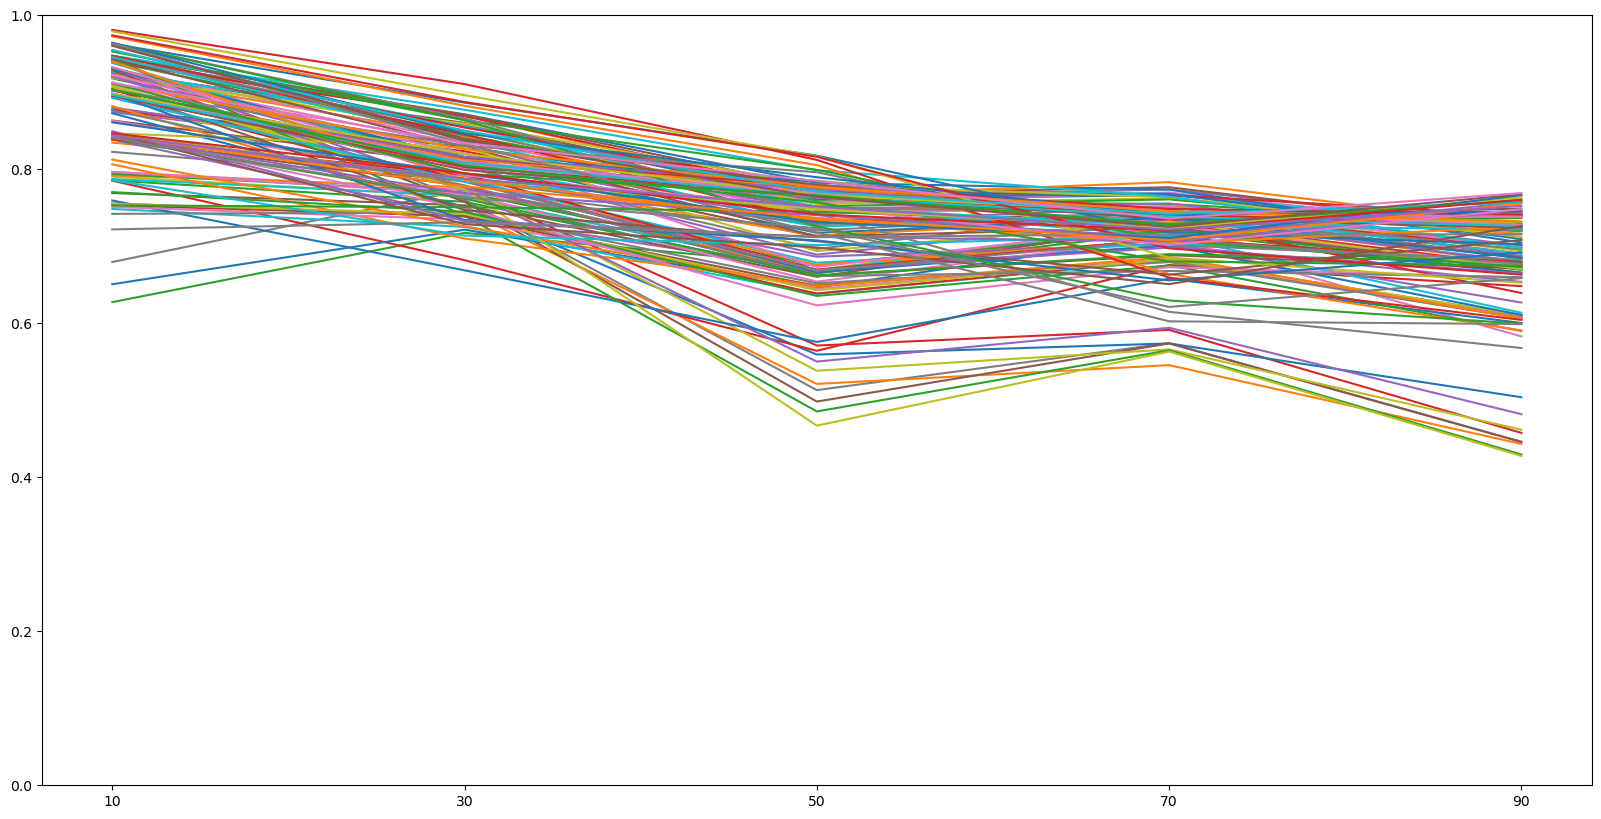

In [54]:
n_clusters = 6
kmeans = KMeans(n_clusters = n_clusters, ).fit(all_result.loc[:, '10':'90'])
# print(kmeans)
for j in range(n_clusters):
    clf, imbl, nes = [], [], []
    plt.figure(figsize = (20, 10))
    for i in range(len(df)):
        if kmeans.labels_[i] == j:
            clf.append(all_result.loc[i, 'clf'])
            imbl.append(all_result.loc[i, 'imbl'])
            nes.append(all_result.loc[i, 'name'])
            plt.plot(dp.loc[i])
    print('number of samples: ', len(clf), '\n')
    print('datasets: ', np.unique(nes), '\n')
    print('number of classifiers: ', len(np.unique(clf)))
    print(np.unique(clf), '\n')
    print('number of samplings: ', len(np.unique(imbl)))
    print(np.unique(imbl), '\n')
    print('miss classifiers:', [x for x in clfs if not x in np.unique(clf)], '\n')
    print('miss samplings:', [x for x in samplings if not x in np.unique(imbl)], '\n')
    plt.ylim(0.0, 1.0)
    plt.show()

# Hierarchical Clustering

number of samples:  157 

datasets:  ['caesarian' 'dataR2'] 

number of classifiers:  9
['Adaboost' 'Catboost' 'DecisionTree' 'ExtraTree' 'Logit' 'Random_forest'
 'SVM' 'Xgboost' 'kNN'] 

number of samplings:  16
['ADASYN' 'AMSCO' 'Borderline_smote' 'Lee' 'NRAS' 'NearMiss' 'ProWSyn'
 'RandomOverSampler' 'RandomUnderSampler' 'SMOTE' 'Smote_tomek' 'Tomek'
 'kmeans_SMOTE' 'lvq_smote' 'polynom_fit_SMOTE' 'pure'] 

miss classifiers: [] 

miss samplings: ['EditedNearestNeighbours'] 



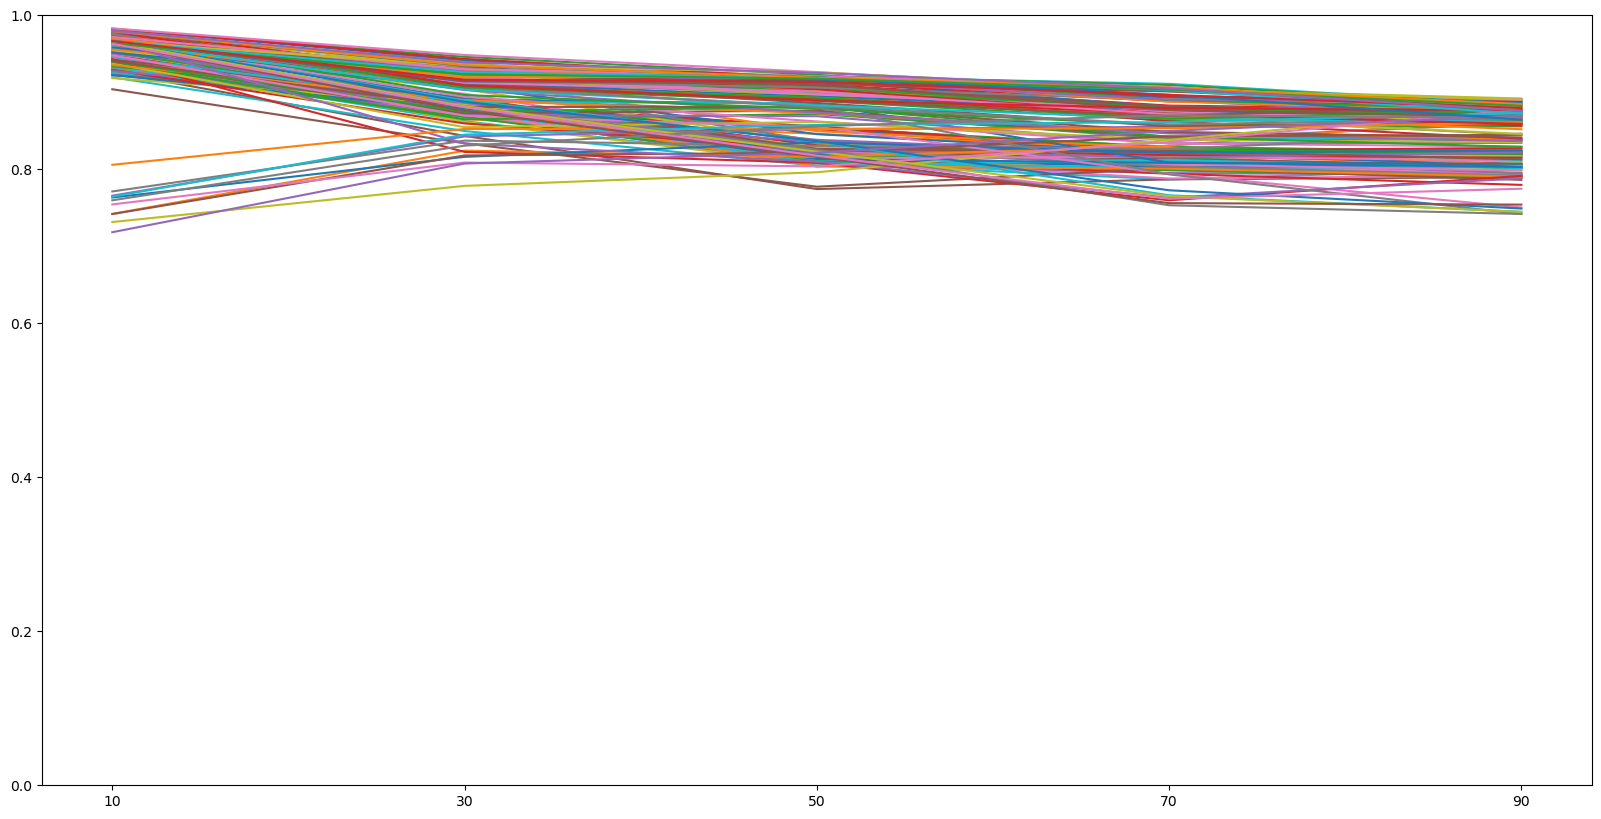

number of samples:  124 

datasets:  ['breast-cancer' 'haberman'] 

number of classifiers:  9
['Adaboost' 'Catboost' 'DecisionTree' 'ExtraTree' 'Logit' 'Random_forest'
 'SVM' 'Xgboost' 'kNN'] 

number of samplings:  17
['ADASYN' 'AMSCO' 'Borderline_smote' 'EditedNearestNeighbours' 'Lee'
 'NRAS' 'NearMiss' 'ProWSyn' 'RandomOverSampler' 'RandomUnderSampler'
 'SMOTE' 'Smote_tomek' 'Tomek' 'kmeans_SMOTE' 'lvq_smote'
 'polynom_fit_SMOTE' 'pure'] 

miss classifiers: [] 

miss samplings: [] 



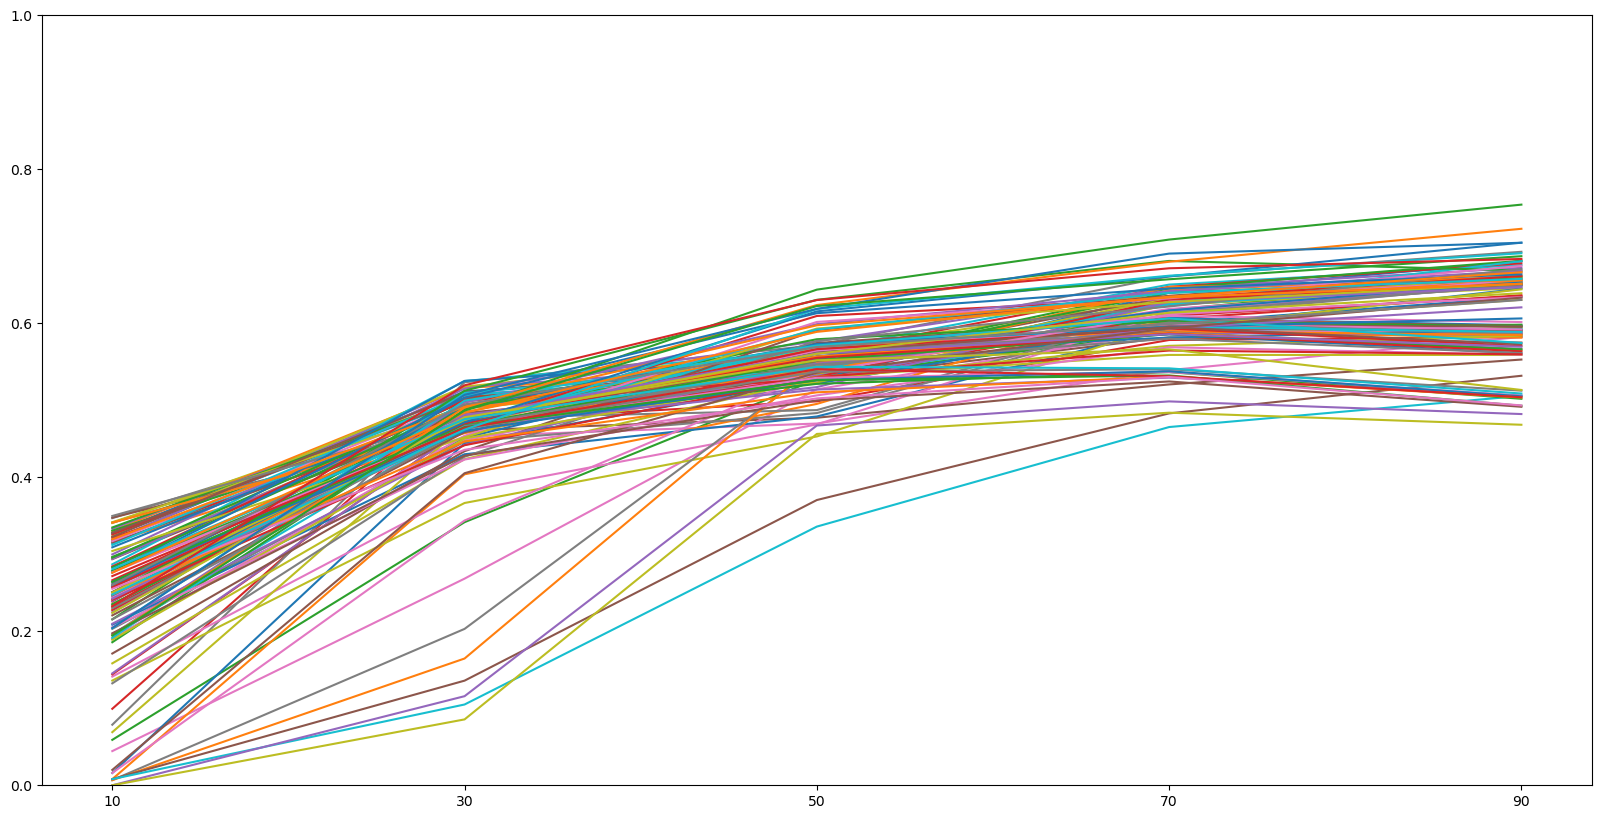

number of samples:  126 

datasets:  ['caesarian' 'dataR2'] 

number of classifiers:  9
['Adaboost' 'Catboost' 'DecisionTree' 'ExtraTree' 'Logit' 'Random_forest'
 'SVM' 'Xgboost' 'kNN'] 

number of samplings:  16
['ADASYN' 'AMSCO' 'Borderline_smote' 'EditedNearestNeighbours' 'Lee'
 'NRAS' 'NearMiss' 'ProWSyn' 'RandomOverSampler' 'SMOTE' 'Smote_tomek'
 'Tomek' 'kmeans_SMOTE' 'lvq_smote' 'polynom_fit_SMOTE' 'pure'] 

miss classifiers: [] 

miss samplings: ['RandomUnderSampler'] 



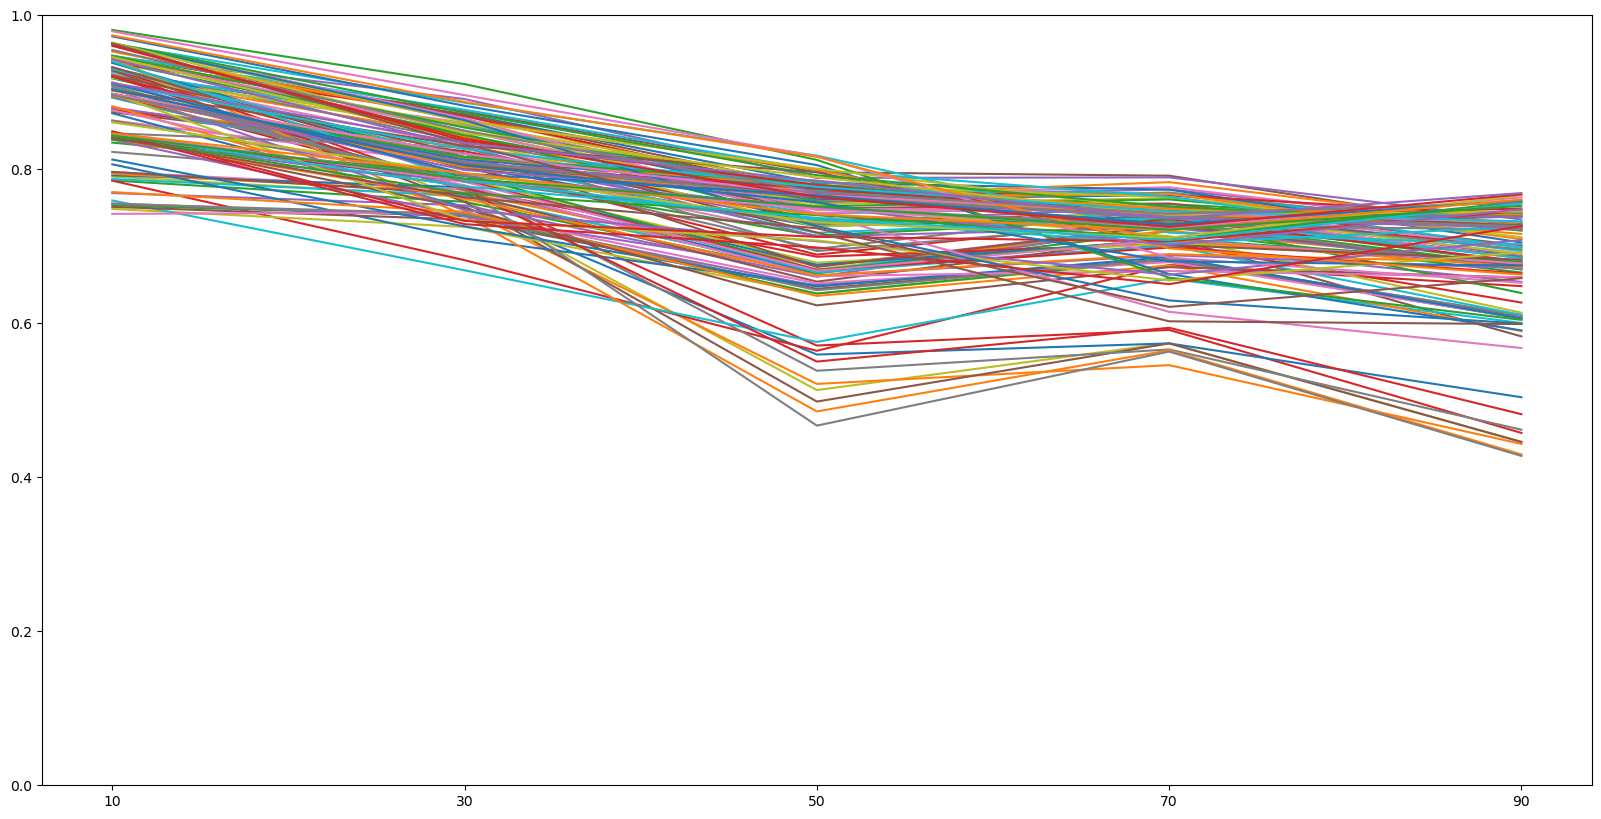

number of samples:  76 

datasets:  ['breast-cancer' 'caesarian' 'dataR2' 'haberman'] 

number of classifiers:  9
['Adaboost' 'Catboost' 'DecisionTree' 'ExtraTree' 'Logit' 'Random_forest'
 'SVM' 'Xgboost' 'kNN'] 

number of samplings:  16
['ADASYN' 'AMSCO' 'Borderline_smote' 'EditedNearestNeighbours' 'Lee'
 'NearMiss' 'ProWSyn' 'RandomOverSampler' 'RandomUnderSampler' 'SMOTE'
 'Smote_tomek' 'Tomek' 'kmeans_SMOTE' 'lvq_smote' 'polynom_fit_SMOTE'
 'pure'] 

miss classifiers: [] 

miss samplings: ['NRAS'] 



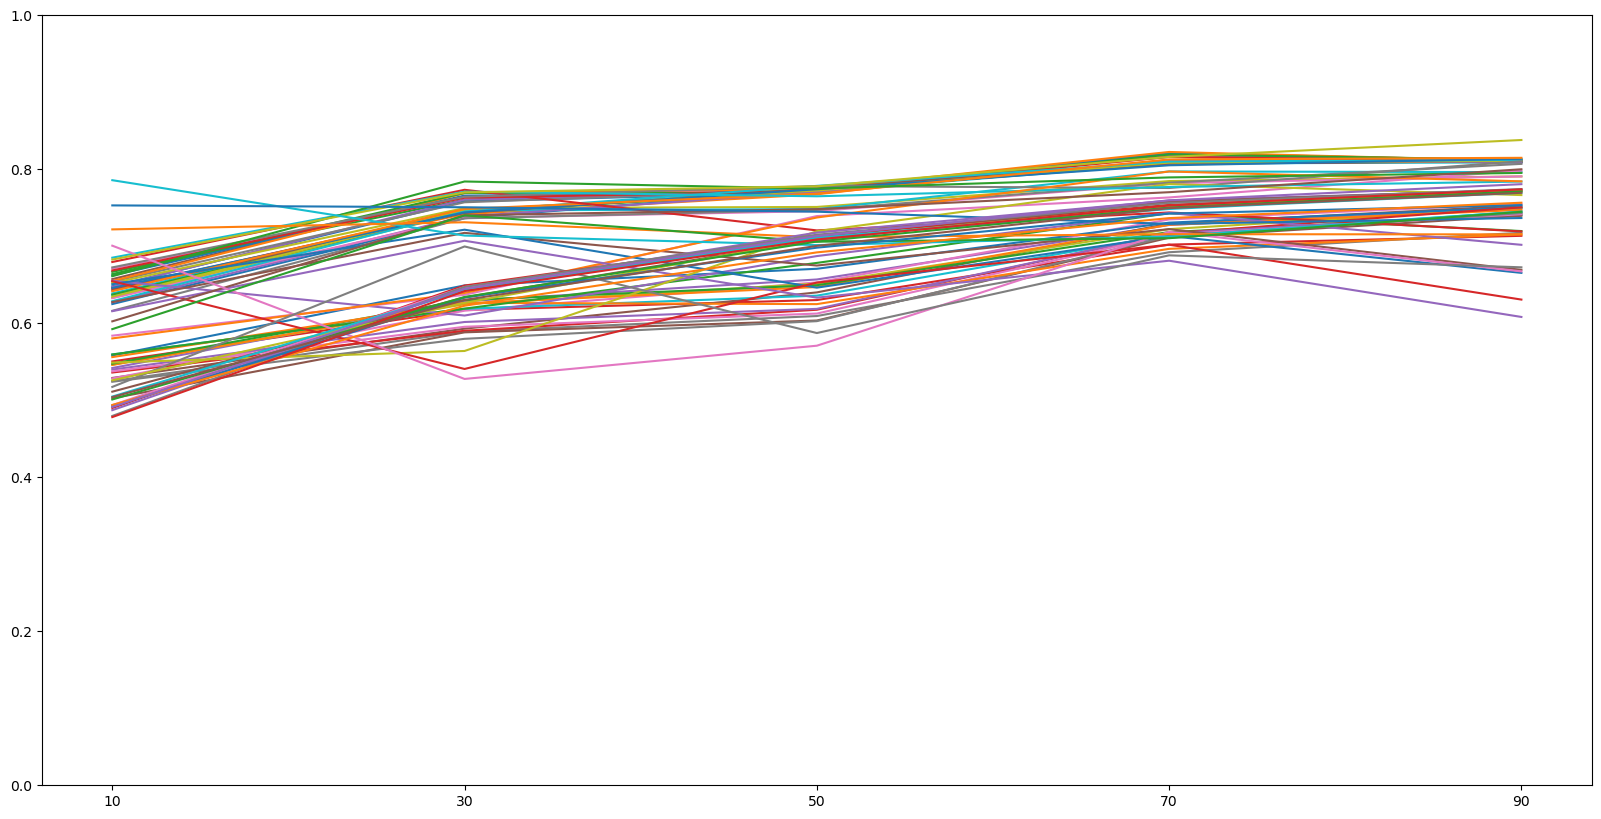

number of samples:  153 

datasets:  ['diabetes'] 

number of classifiers:  9
['Adaboost' 'Catboost' 'DecisionTree' 'ExtraTree' 'Logit' 'Random_forest'
 'SVM' 'Xgboost' 'kNN'] 

number of samplings:  17
['ADASYN' 'AMSCO' 'Borderline_smote' 'EditedNearestNeighbours' 'Lee'
 'NRAS' 'NearMiss' 'ProWSyn' 'RandomOverSampler' 'RandomUnderSampler'
 'SMOTE' 'Smote_tomek' 'Tomek' 'kmeans_SMOTE' 'lvq_smote'
 'polynom_fit_SMOTE' 'pure'] 

miss classifiers: [] 

miss samplings: [] 



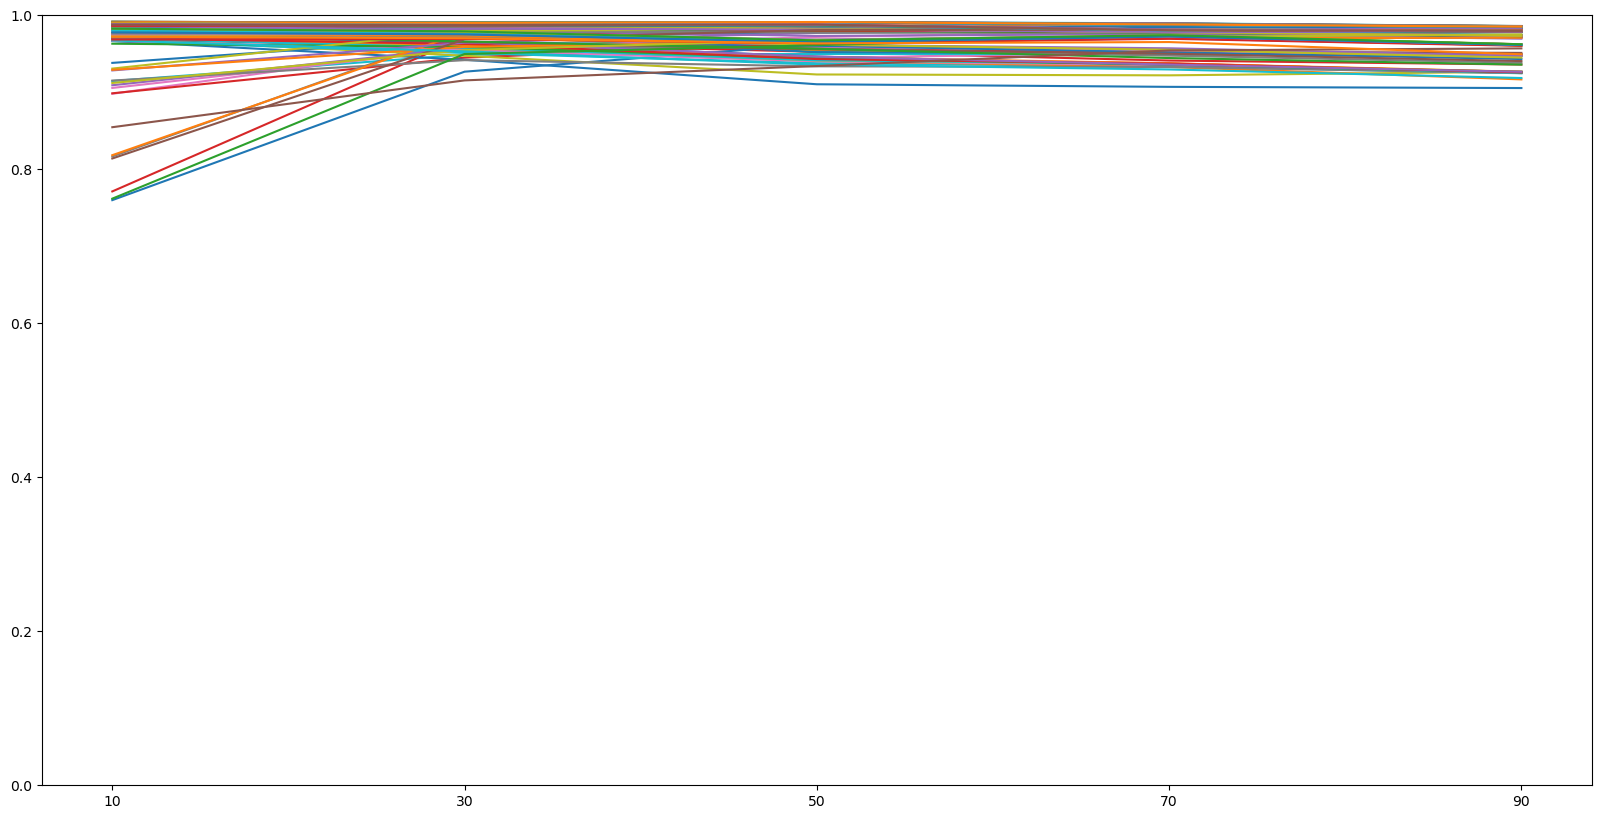

number of samples:  129 

datasets:  ['breast-cancer' 'caesarian' 'haberman'] 

number of classifiers:  8
['Catboost' 'DecisionTree' 'ExtraTree' 'Logit' 'Random_forest' 'SVM'
 'Xgboost' 'kNN'] 

number of samplings:  17
['ADASYN' 'AMSCO' 'Borderline_smote' 'EditedNearestNeighbours' 'Lee'
 'NRAS' 'NearMiss' 'ProWSyn' 'RandomOverSampler' 'RandomUnderSampler'
 'SMOTE' 'Smote_tomek' 'Tomek' 'kmeans_SMOTE' 'lvq_smote'
 'polynom_fit_SMOTE' 'pure'] 

miss classifiers: ['Adaboost'] 

miss samplings: [] 



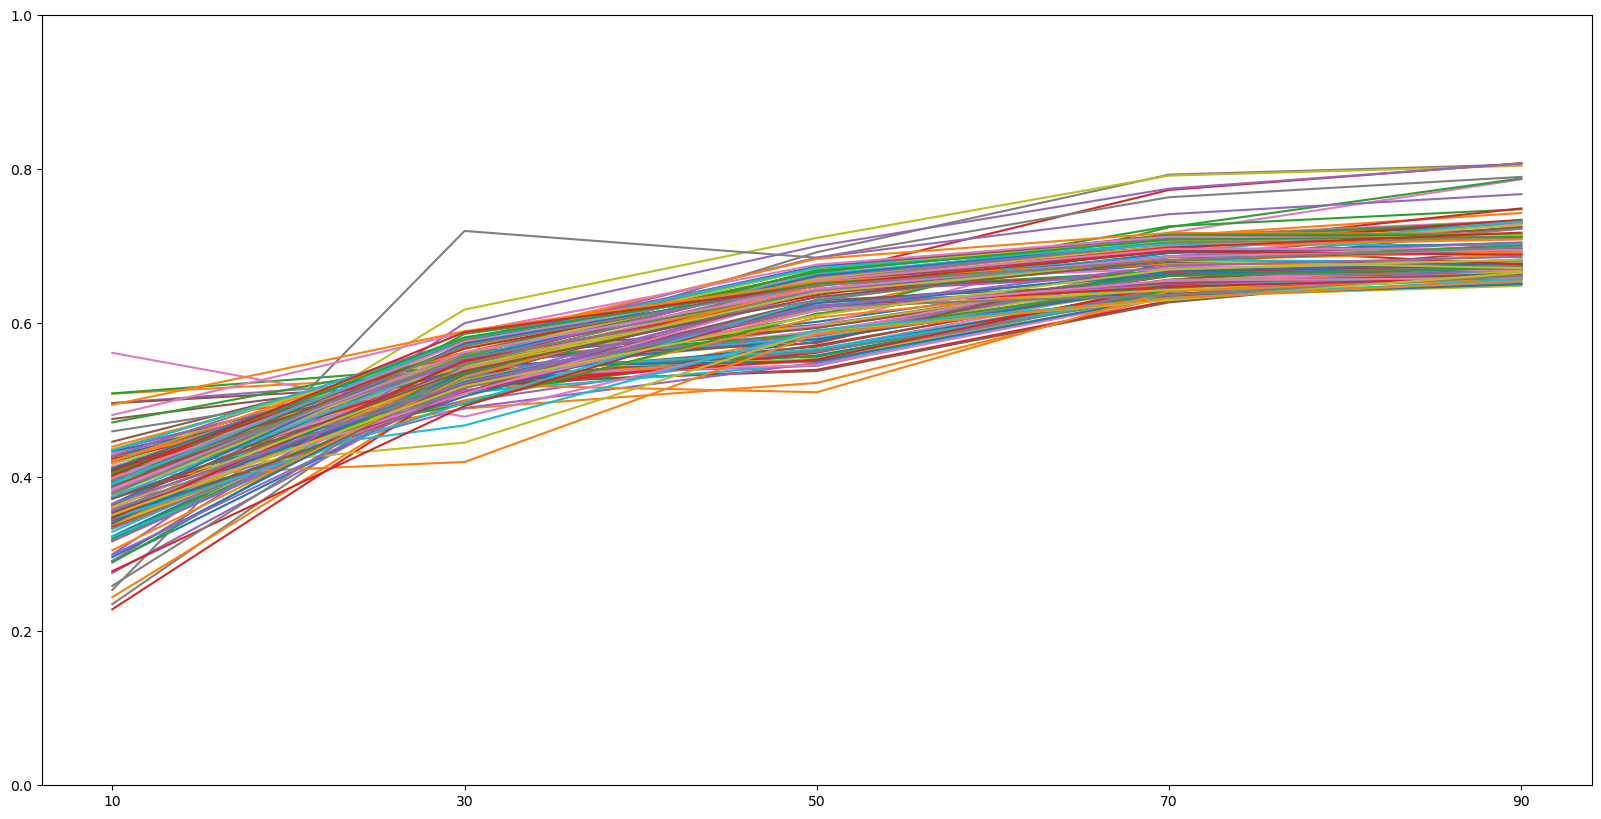

In [55]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 6
kmeans = AgglomerativeClustering(n_clusters = n_clusters).fit(all_result.loc[:, '10':'90'])
# print(kmeans)
for j in range(n_clusters):
    clf, imbl, nes = [], [], []
    plt.figure(figsize = (20, 10))
    for i in range(len(df)):
        if kmeans.labels_[i] == j:
            clf.append(all_result.loc[i, 'clf'])
            imbl.append(all_result.loc[i, 'imbl'])
            nes.append(all_result.loc[i, 'name'])
            plt.plot(dp.loc[i])
    print('number of samples: ', len(clf), '\n')
    print('datasets: ', np.unique(nes), '\n')
    print('number of classifiers: ', len(np.unique(clf)))
    print(np.unique(clf), '\n')
    print('number of samplings: ', len(np.unique(imbl)))
    print(np.unique(imbl), '\n')
    print('miss classifiers:', [x for x in clfs if not x in np.unique(clf)], '\n')
    print('miss samplings:', [x for x in samplings if not x in np.unique(imbl)], '\n')
    plt.ylim(0.0, 1.0)
    plt.show()